In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("car_price_prediction_.csv", delimiter=",")

df.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


In [11]:
# Análise Descritiva da Váriavel Price


df['Price'].describe().round(2)

count     2500.00
mean     52638.02
std      27295.83
min       5011.27
25%      28908.48
50%      53485.24
75%      75838.53
max      99982.59
Name: Price, dtype: float64

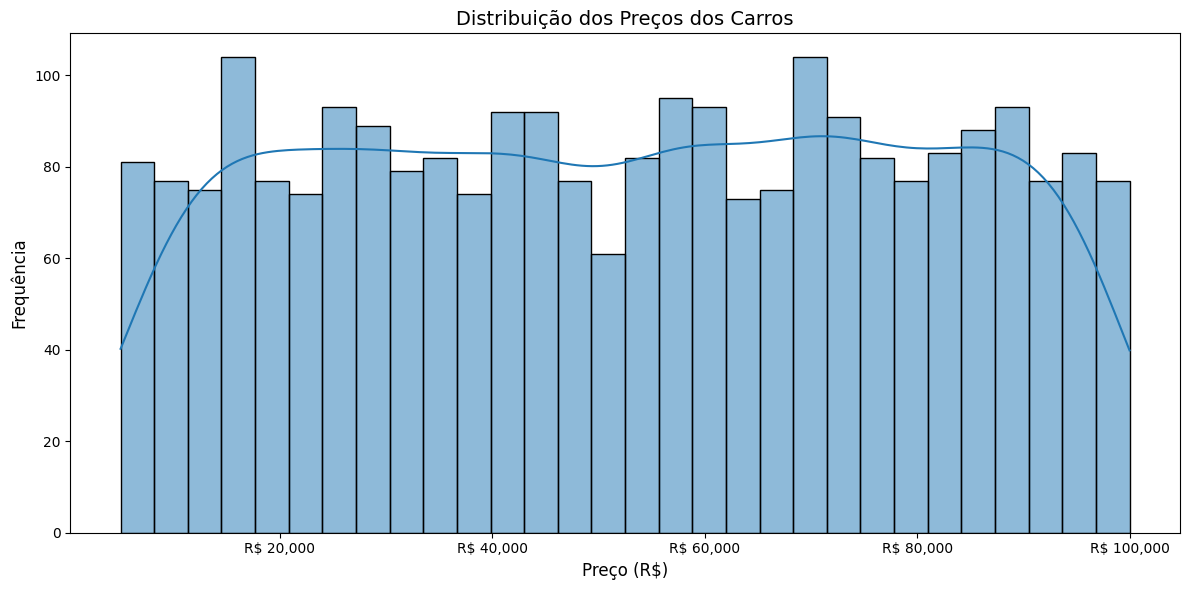

In [5]:
# Criando o histograma para os preços
plt.figure(figsize=(12, 6))

# Criando o histograma com seaborn
sns.histplot(data=df, x='Price', bins=30, kde=True)

# Personalizando o gráfico
plt.title('Distribuição dos Preços dos Carros', fontsize=14)
plt.xlabel('Preço (R$)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

# Formatando o eixo x para mostrar valores em reais
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'R$ {x:,.0f}'))

# Ajustando o layout para evitar cortes
plt.tight_layout()

# Mostrando o gráfico
plt.show()

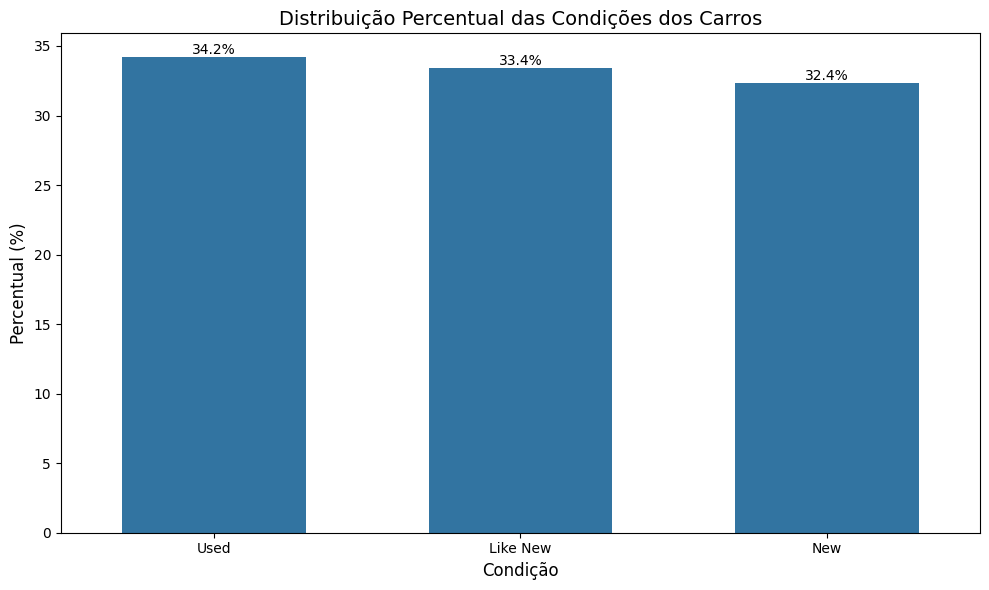

In [35]:

# Calculando os percentuais da coluna condition
condition_percent = df['Condition'].value_counts(normalize=True) * 100

# Criando o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=condition_percent.index, y=condition_percent.values, width=0.6)

# Personalizando o gráfico
plt.title('Distribuição Percentual das Condições dos Carros', fontsize=14)
plt.xlabel('Condição', fontsize=12)
plt.ylabel('Percentual (%)', fontsize=12)

# Adicionando os valores percentuais em cima das barras
for i, v in enumerate(condition_percent.values):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [12]:
# Quantidade de marcas únicas
num_marcas = df['Brand'].nunique()
print(f"Quantidade de marcas únicas: {num_marcas}")

Quantidade de marcas únicas: 7


In [15]:
marcas_mais_comuns = df['Brand'].value_counts().head(5)
print("\nAs 5 marcas mais comuns:")
print(marcas_mais_comuns)


As 5 marcas mais comuns:
Brand
Toyota      374
Audi        368
BMW         358
Mercedes    353
Honda       352
Name: count, dtype: int64


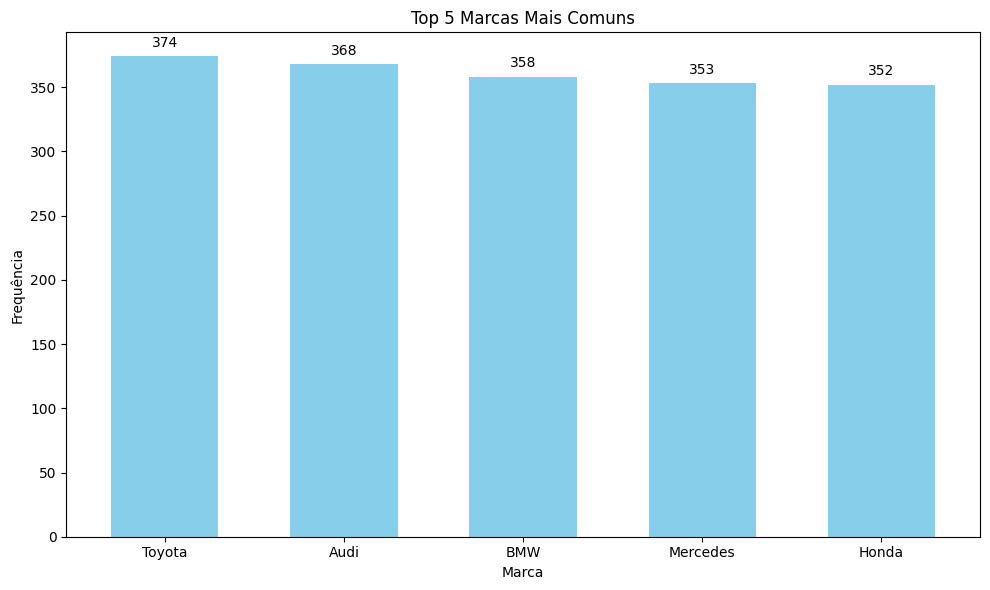

In [50]:

# Contar as 15 marcas mais comuns
marcas_mais_comuns = df['Brand'].value_counts().head(5)

# Plotar gráfico de barras
plt.figure(figsize=(10, 6))
ax = marcas_mais_comuns.plot(kind='bar', color='skyblue', width=0.6)

plt.title('Top 5 Marcas Mais Comuns')
plt.xlabel('Marca')
plt.ylabel('Frequência')
plt.xticks(rotation=0)

for i, v in enumerate(marcas_mais_comuns.values):
    ax.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


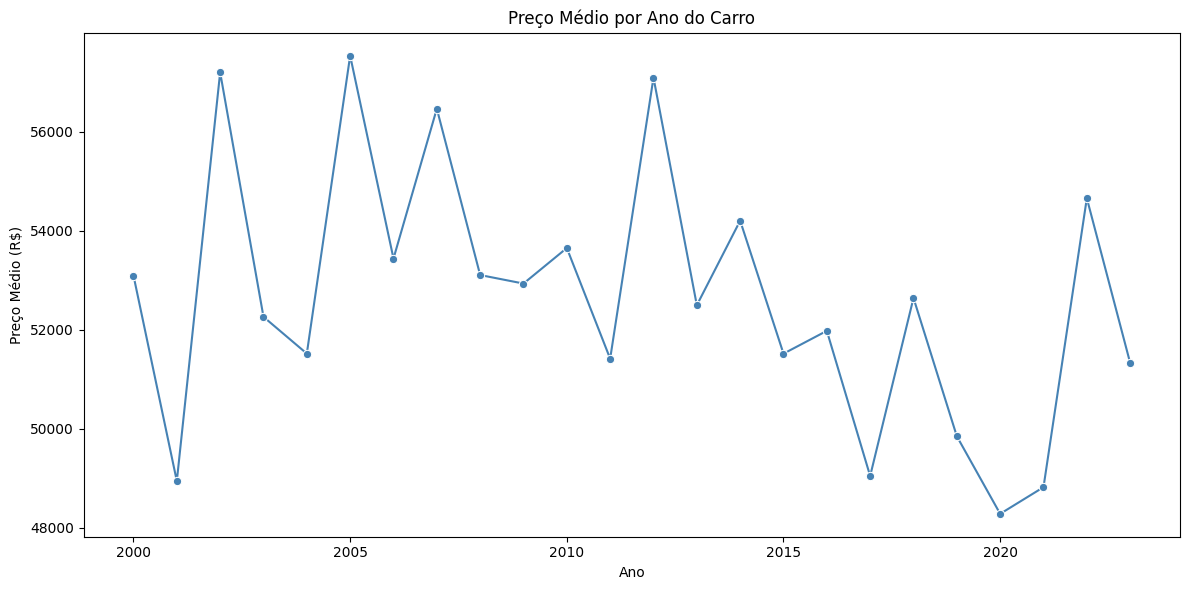

In [40]:
# Preço médio por ano

# Agrupar por ano e calcular média de preço
preco_por_ano = df.groupby('Year')['Price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=preco_por_ano, x='Year', y='Price', marker='o', color='steelblue')
plt.title('Preço Médio por Ano do Carro')
plt.xlabel('Ano')
plt.ylabel('Preço Médio (R$)')
plt.grid(False)
plt.tight_layout()
plt.show()

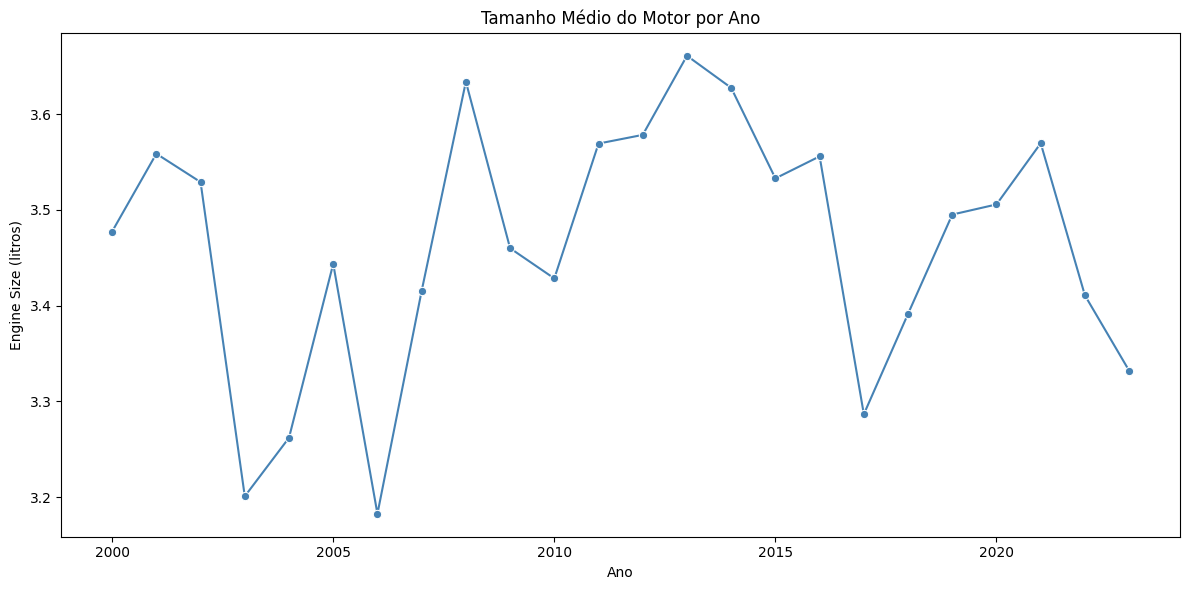

In [37]:
# Agrupar por ano e calcular média do tamanho do motor
motor_por_ano = df.groupby('Year')['Engine Size'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=motor_por_ano, x='Year', y='Engine Size', marker='o', color='steelblue')
plt.title('Tamanho Médio do Motor por Ano')
plt.xlabel('Ano')
plt.ylabel('Engine Size (litros)')
plt.grid(False)
plt.tight_layout()
plt.show()

C:\Users\Gustavo\AppData\Local\Temp\ipykernel_20000\1082123261.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Year', y='Price', palette='Set2')


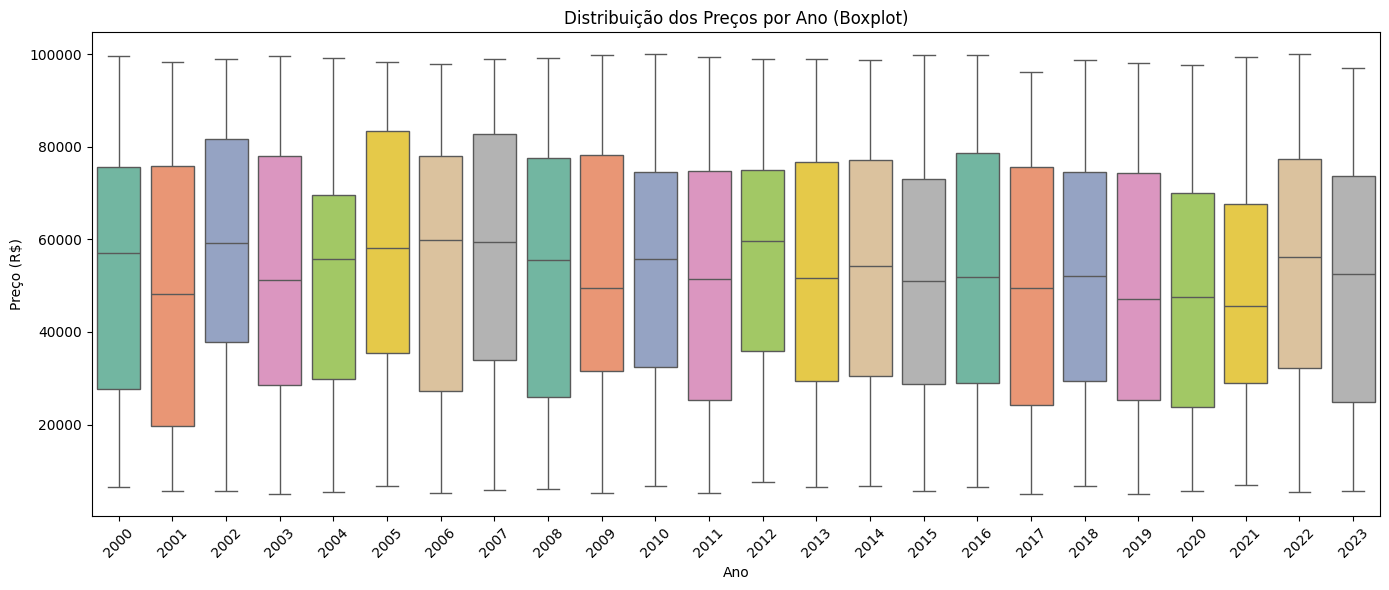

In [32]:
# Distribuição dos preços por ano (boxplot)

plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Year', y='Price', palette='Set2')
plt.title('Distribuição dos Preços por Ano (Boxplot)')
plt.xlabel('Ano')
plt.ylabel('Preço (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
# Agrupar e calcular a média de quilometragem por condição
media_km_por_condicao = df.groupby('Condition')['Mileage'].mean().reset_index().round(2)

print("Média de quilometragem por condição:")
print(media_km_por_condicao)


Média de quilometragem por condição:
  Condition    Mileage
0  Like New  151986.43
1       New  148667.97
2      Used  148586.63


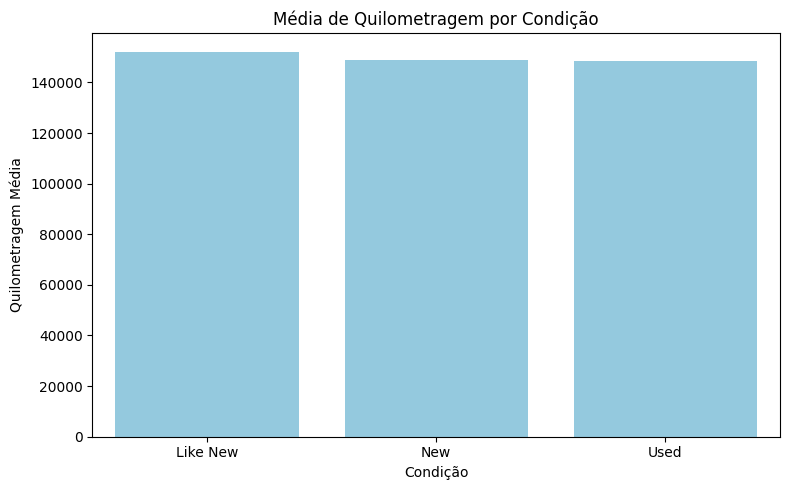

In [49]:

plt.figure(figsize=(8, 5))
sns.barplot(data=media_km_por_condicao, x='Condition', y='Mileage', color='skyblue')
plt.title('Média de Quilometragem por Condição')
plt.xlabel('Condição')
plt.ylabel('Quilometragem Média')
plt.tight_layout()
plt.show()


In [45]:
# Contagem das marcas mais comuns para cada condição
marcas_por_condicao = df.groupby(['Condition', 'Brand']).size().reset_index(name='Frequência')

# Para cada condição, mostrar as 5 marcas mais comuns
print("Top 5 marcas por condição:")

for condicao in marcas_por_condicao['Condition'].unique():
    top_marcas = marcas_por_condicao[marcas_por_condicao['Condition'] == condicao] \
                    .sort_values(by='Frequência', ascending=False) \
                    .head(5)
    print(f"\n{condicao}:")
    print(top_marcas[['Brand', 'Frequência']])


Top 5 marcas por condição:

Like New:
   Brand  Frequência
1    BMW         138
2   Ford         124
3  Honda         123
5  Tesla         121
0   Audi         111

New:
       Brand  Frequência
7       Audi         129
13    Toyota         120
12     Tesla         119
11  Mercedes         115
9       Ford         113

Used:
       Brand  Frequência
20    Toyota         145
14      Audi         128
18  Mercedes         128
17     Honda         120
15       BMW         116


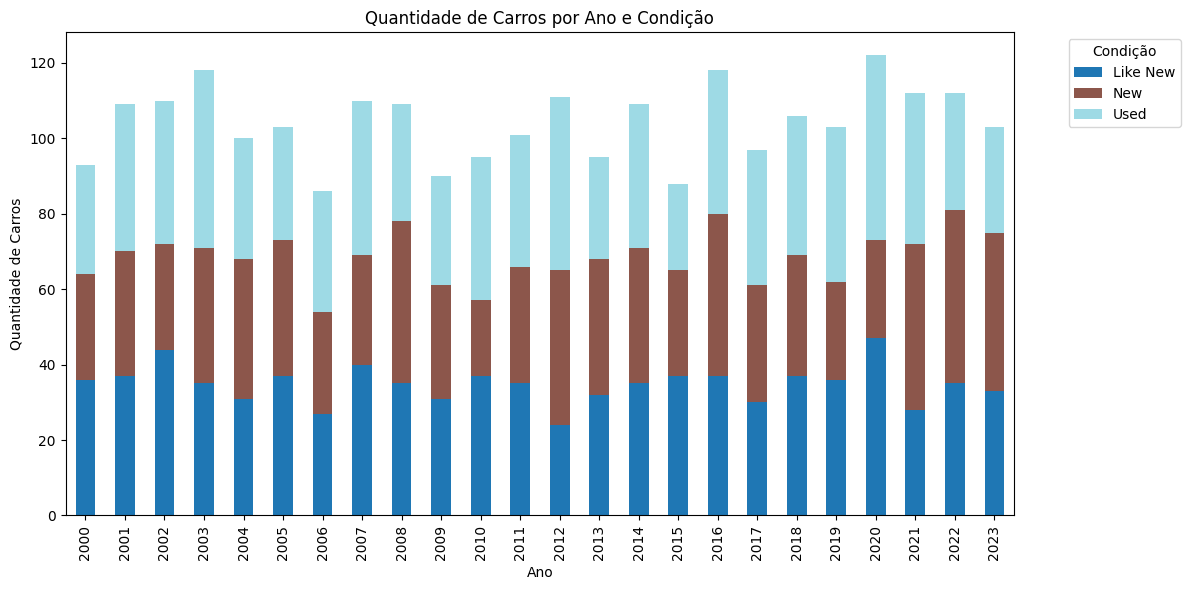

In [47]:
# 1. Contar carros por ano e condição
contagem = df.groupby(['Year', 'Condition']).size().unstack(fill_value=0)

# 2. Plotar gráfico de barras empilhadas
contagem.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='tab20'  # ou outro mapa de cores como 'Set2', 'Pastel1', 'Accent'
)

# 3. Personalização do gráfico
plt.title('Quantidade de Carros por Ano e Condição')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Carros')
plt.legend(title='Condição', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()